In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
data_set = pd.DataFrame(pd.read_csv('KAG_energydata_complete.csv'))
data = data_set[['date', 'Appliances']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 2 columns):
date          19735 non-null object
Appliances    19735 non-null int64
dtypes: int64(1), object(1)
memory usage: 308.5+ KB


In [3]:
data['date'] = pd.to_datetime(data['date']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 2 columns):
date          19735 non-null datetime64[ns]
Appliances    19735 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 308.5 KB


In [4]:
data.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [5]:
data.isnull().sum()

date          0
Appliances    0
dtype: int64

In [6]:
data.date.min(), data.date.max()

(Timestamp('2016-01-11 17:00:00'), Timestamp('2016-05-27 18:00:00'))

### Visualizing the data

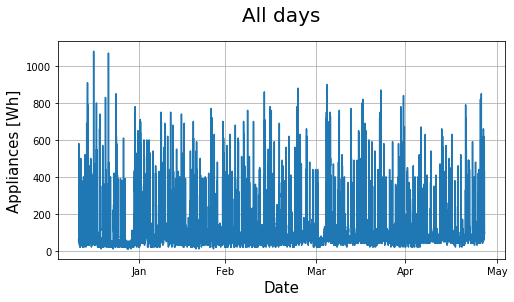

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%M%')
days = mdates.DayLocator()
days_fmt = mdates.DateFormatter('%D%')
hours = mdates.HourLocator()
hours_fmt = mdates.DateFormatter('%H:%M:%S')

# plotting all days
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(data['date'], data['Appliances'])
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Appliances [Wh]', fontsize = 15)
ax.set_title('All days', fontsize = 20, pad = 20)

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr','May'])
ax.grid()

plt.show()

#### Remarks:
- The highest values of Appliances occured in January - could be due to additional heating appliances usage
- There are dips at the end of January and beginning of March - seems insignificant 

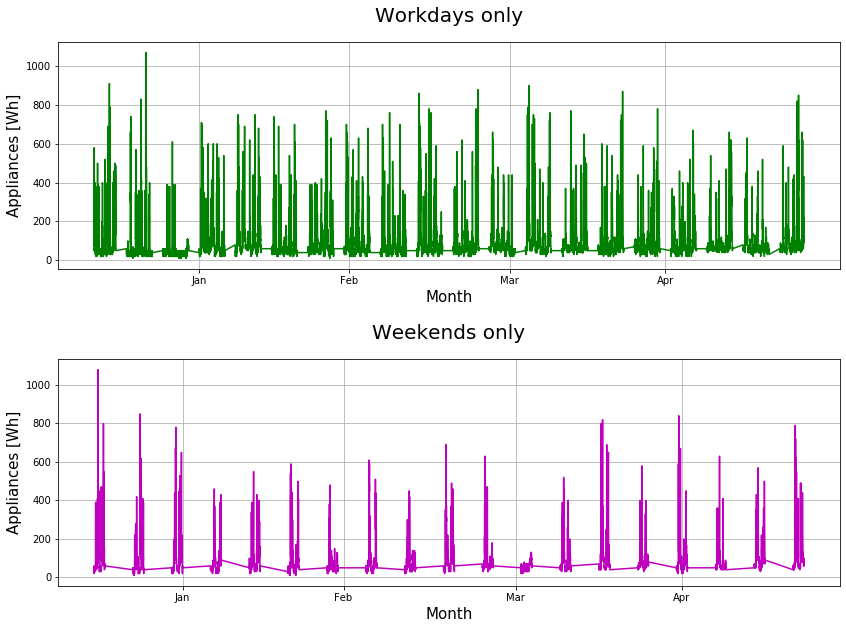

In [8]:
# splitting the data into workdays and weekends

workdays = data.loc[(data['date'].dt.weekday == 0) | (data['date'].dt.weekday == 1) | 
                      (data['date'].dt.weekday == 2) | (data['date'].dt.weekday == 3) | 
                      (data['date'].dt.weekday == 4)]

weekends = data.loc[(data['date'].dt.weekday == 5) | (data['date'].dt.weekday == 6)]

# plotting
fig = plt.figure(figsize=(14,10))
gs = fig.add_gridspec(2,1)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.4)
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(workdays.date, workdays.Appliances, 'g')
ax1.set_xlabel('Month', fontsize = 15)
ax1.set_ylabel('Appliances [Wh]', fontsize = 15)
ax1.set_title('Workdays only', fontsize = 20, pad = 20)
ax1.grid()
# format the ticks
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(months_fmt)
ax1.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr','May'])

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(weekends.date, weekends.Appliances, 'm')
ax2.set_xlabel('Month', fontsize = 15)
ax2.set_ylabel('Appliances [Wh]', fontsize = 15)
ax2.set_title('Weekends only', fontsize = 20, pad = 20)
ax2.grid()
# format the ticks
ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(months_fmt)
ax2.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr','May'])
plt.show()

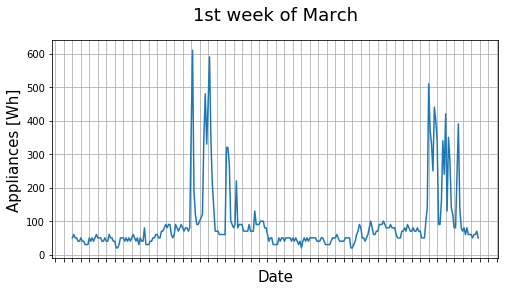

In [9]:
# looking closer into the first weekend in March:
March_wknd = data.loc[(data.date.dt.month == 3) & 
         ((data.date.dt.weekday == 5) | (data.date.dt.weekday == 6))] # there are 144 10-min intervals/day
# there are 144 10-min intervals/day - [:288]
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(March_wknd[:288].date, March_wknd[:288].Appliances)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Appliances [Wh]', fontsize = 15)
ax.set_title('1st week of March', fontsize = 18, pad = 20)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_ticklabels([])
ax.grid()

In [10]:
print('Workdays:\n', workdays.describe(), '\n\nWeekends:\n',weekends.describe())

Workdays:
          Appliances
count  14263.000000
mean      96.587674
std      103.086372
min       10.000000
25%       50.000000
50%       60.000000
75%       90.000000
max     1070.000000 

Weekends:
         Appliances
count  5472.000000
mean    100.581140
std     100.998987
min      10.000000
25%      50.000000
50%      70.000000
75%     100.000000
max    1080.000000


In [11]:
print("\n\nNumber of single occurances on workdays:\n", 
      (workdays.Appliances.value_counts() == 1).value_counts(),
      "\n\nNumber of single occurances on weekends:\n", 
      (weekends.Appliances.value_counts() == 1).value_counts())



Number of single occurances on workdays:
 False    78
True     11
Name: Appliances, dtype: int64 

Number of single occurances on weekends:
 False    69
True     12
Name: Appliances, dtype: int64


In [12]:
workdays.Appliances.value_counts().tail(11)

870     1
670     1
850     1
880     1
830     1
890     1
910     1
820     1
860     1
900     1
1070    1
Name: Appliances, dtype: int64

In [13]:
weekends.Appliances.value_counts().tail(12)

850     1
640     1
680     1
700     1
720     1
780     1
820     1
840     1
710     1
730     1
750     1
1080    1
Name: Appliances, dtype: int64

#### Remarks:
- Both the mean and standard deviation are pretty similar on workdays and weekends
- All single occurances are the highest data points (highest energy consumption) which makes the std quite large (same order of magnitude as the mean)
- Regarding the 1st week of March, it looks like it was a very lazy Sunday or the houshold wasn't at home until the evening

In [14]:
Mondays = data.loc[data.date.dt.weekday == 0]
Tuesdays = data.loc[data.date.dt.weekday == 1]
Wednesdays = data.loc[data.date.dt.weekday == 2]
Thursdays = data.loc[data.date.dt.weekday == 3]
Fridays = data.loc[data.date.dt.weekday == 4]
Saturdays = data.loc[data.date.dt.weekday == 5]
Sundays = data.loc[data.date.dt.weekday == 6]

# agregating data per day of the week:
Mondays_avg = Mondays.groupby(Mondays.date.dt.time).mean()[['Appliances']]
Mondays_avg.reset_index(inplace=True)
Tuesdays_avg = Tuesdays.groupby(Tuesdays.date.dt.time).mean()[['Appliances']]
Tuesdays_avg.reset_index(inplace=True)
Wednesdays_avg = Wednesdays.groupby(Wednesdays.date.dt.time).mean()[['Appliances']]
Wednesdays_avg.reset_index(inplace=True)
Thursdays_avg = Thursdays.groupby(Thursdays.date.dt.time).mean()[['Appliances']]
Thursdays_avg.reset_index(inplace=True)
Fridays_avg = Fridays.groupby(Fridays.date.dt.time).mean()[['Appliances']]
Fridays_avg.reset_index(inplace=True)
Saturdays_avg = Saturdays.groupby(Saturdays.date.dt.time).mean()[['Appliances']]
Saturdays_avg.reset_index(inplace=True)
Sundays_avg = Sundays.groupby(Sundays.date.dt.time).mean()[['Appliances']]
Sundays_avg.reset_index(inplace=True)

Mondays_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
date          144 non-null object
Appliances    144 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


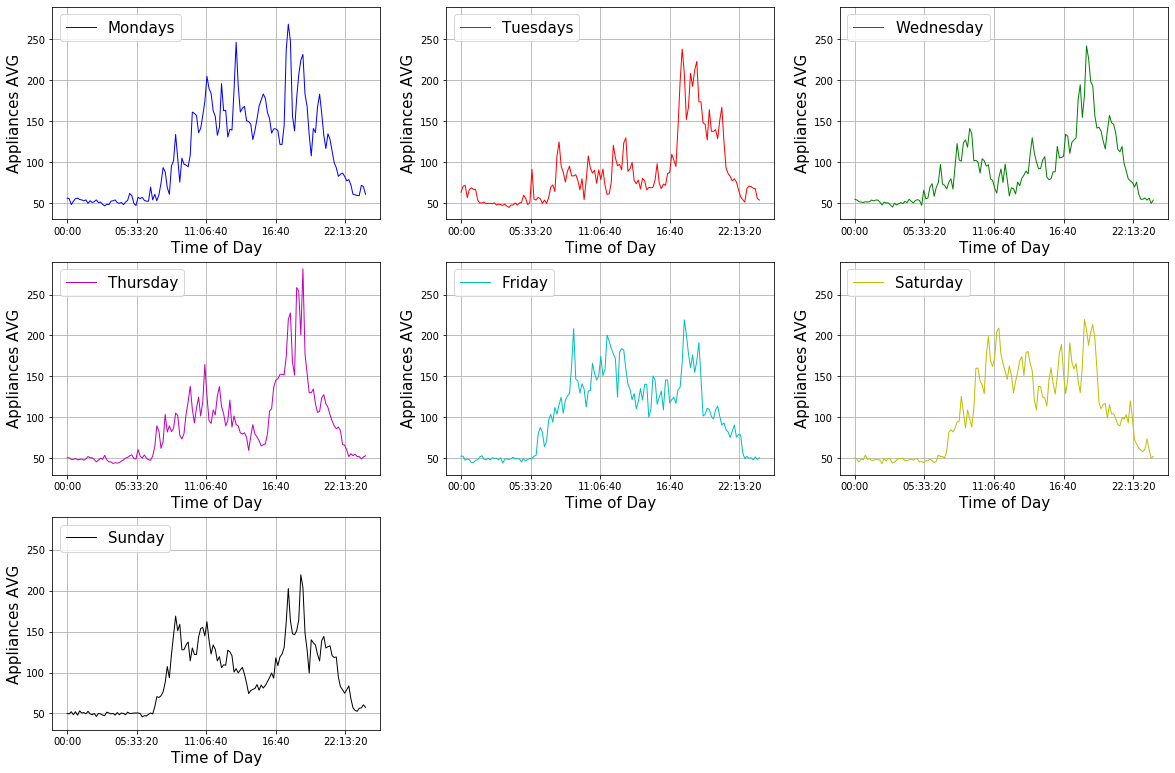

In [15]:
# plotting 
fig = plt.figure(figsize=(20,18))
gs = fig.add_gridspec(4,3)
fig.tight_layout()
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(Mondays_avg.date, Mondays_avg.Appliances, 'b', linewidth = 1)
ax1.set_xlabel('Time of Day', fontsize = 15)
ax1.set_ylabel('Appliances AVG', fontsize = 15)
ax1.legend(['Mondays'], fontsize = 15, loc = 'upper left')
ax1.set_ylim(30,290)
ax1.grid()
ax2 = fig.add_subplot(gs[0,1])
ax2.plot(Tuesdays_avg.date, Tuesdays_avg.Appliances, 'r', linewidth = 1)
ax2.set_xlabel('Time of Day', fontsize = 15)
ax2.set_ylabel('Appliances AVG', fontsize = 15)
ax2.legend(['Tuesdays'], fontsize = 15, loc = 'upper left')
ax2.set_ylim(30,290)
ax2.grid()
#ax2.set_xticklabels(labels = [])
ax3 = fig.add_subplot(gs[0,2])
ax3.plot(Wednesdays_avg.date, Wednesdays_avg.Appliances, 'g', linewidth = 1)
ax3.set_xlabel('Time of Day', fontsize = 15)
ax3.set_ylabel('Appliances AVG', fontsize = 15)
ax3.legend(['Wednesday'], fontsize = 15, loc = 'upper left')
ax3.set_ylim(30,290)
ax3.grid()
#ax3.set_xticklabels(labels = [])
ax4 = fig.add_subplot(gs[1,0])
ax4.plot(Thursdays_avg.date, Thursdays_avg.Appliances, 'm', linewidth = 1)
ax4.set_xlabel('Time of Day', fontsize = 15)
ax4.set_ylabel('Appliances AVG', fontsize = 15)
ax4.legend(['Thursday'], fontsize = 15, loc = 'upper left')
ax4.set_ylim(30,290)
ax4.grid()
#ax4.set_xticklabels(labels = [])
ax5 = fig.add_subplot(gs[1,1])
ax5.plot(Fridays_avg.date, Fridays_avg.Appliances, 'c', linewidth = 1)
ax5.set_xlabel('Time of Day', fontsize = 15)
ax5.set_ylabel('Appliances AVG', fontsize = 15)
ax5.legend(['Friday'], fontsize = 15, loc = 'upper left')
ax5.set_ylim(30,290)
ax5.grid()
#ax5.set_xticklabels(labels = [])
ax6 = fig.add_subplot(gs[1,2])
ax6.plot(Saturdays_avg.date, Saturdays_avg.Appliances, 'y', linewidth = 1)
ax6.set_xlabel('Time of Day', fontsize = 15)
ax6.set_ylabel('Appliances AVG', fontsize = 15)
ax6.legend(['Saturday'], fontsize = 15, loc = 'upper left')
ax6.set_ylim(30,290)
ax6.grid()
#ax6.set_xticklabels(labels = [])
ax7 = fig.add_subplot(gs[2,0])
ax7.plot(Sundays_avg.date, Sundays_avg.Appliances, 'k', linewidth = 1)
ax7.set_xlabel('Time of Day', fontsize = 15)
ax7.set_ylabel('Appliances AVG', fontsize = 15)
ax7.legend(['Sunday'], fontsize = 15, loc = 'upper left')
ax7.set_ylim(30,290)
ax7.grid()
#ax7.set_xticklabels(labels = [])
plt.show()

In [16]:
print('Monday:\n', Mondays_avg.describe().transpose(),'\n\n\nTuesday:\n', Tuesdays_avg.describe().transpose()
      ,'\n\n\nWednesday:\n', Wednesdays_avg.describe().transpose(),'\n\n\nThursday:\n', 
      Thursdays_avg.describe().transpose(),'\n\n\nFriday:\n', Fridays_avg.describe().transpose()
      ,'\n\n\nSaturday:\n', Saturdays_avg.describe().transpose(),'\n\n\nSunday:\n'
      , Sundays_avg.describe().transpose())

Monday:
             count        mean        std        min        25%         50%  \
Appliances  144.0  111.160453  55.389639  46.315789  55.657895  102.894737   

                   75%    max  
Appliances  155.842105  268.5   


Tuesday:
             count    mean        std   min    25%   50%     75%    max
Appliances  144.0  87.125  41.731011  44.5  56.25  74.5  95.125  238.0 


Wednesday:
             count       mean        std   min   25%   50%      75%    max
Appliances  144.0  89.930556  39.586924  45.0  54.5  79.5  110.625  242.0 


Thursday:
             count       mean        std   min     25%   50%     75%    max
Appliances  144.0  90.434028  46.635293  43.5  51.875  81.0  110.75  281.5 


Friday:
             count        mean        std   min        25%         50%    75%  \
Appliances  144.0  104.536915  47.488777  44.0  50.881579  106.973684  140.5   

              max  
Appliances  219.0   


Saturday:
             count        mean       std        min        25%

#### Remarks:
- As expected, there are no significant peaks up until ≈ 07:00-08:00 (houshold is asleep)
- For all days there is a peak in Appliances around 17:40 (probably when people get home and start using the appliances)
- Mondays are the days with highest average Appliance value (energy consumption) of ≈111 Wh, followed by Saturdays and Fridays with ≈106 Wh and ≈105 Wh respectively, while Tuesdays seem to be the day with the lowest average energy consumption of ≈87 Wh
- Friday and Saturday plots seem pretty similar which to me suggest that the workweek of this houshold is Sun-Thu (though that doesn't include children's schedules)

I will try to do **forecasting** and predict the total appliances energy consumption per day using **ARIMA/SARIMA** method.
### Data wrangling

In [17]:
# aggregate by day and then sum the consumption per day
by_date = data.groupby(data.date.dt.floor('d')).sum()[['Appliances']]
# creating another df where 'date' is my idnex!
by_date0 = data.groupby(data.date.dt.floor('d')).sum()[['Appliances']]
by_date.reset_index(inplace=True)
by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
date          138 non-null datetime64[ns]
Appliances    138 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [18]:
by_date.head()

,date,Appliances
0,2016-01-11,5740
1,2016-01-12,12340
2,2016-01-13,13970
3,2016-01-14,21800
4,2016-01-15,18050


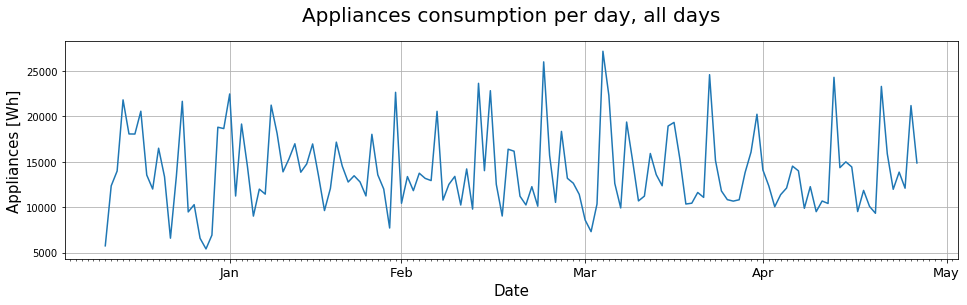

In [19]:
# plotting 
fig, ax = plt.subplots(figsize = (16,4))
ax.plot(by_date.date, by_date.Appliances)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Appliances [Wh]', fontsize = 15)
ax.set_title('Appliances consumption per day, all days', fontsize = 20, pad = 20)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr','May'], fontsize = 13)
ax.grid()
plt.show()

# Is there seasonality?

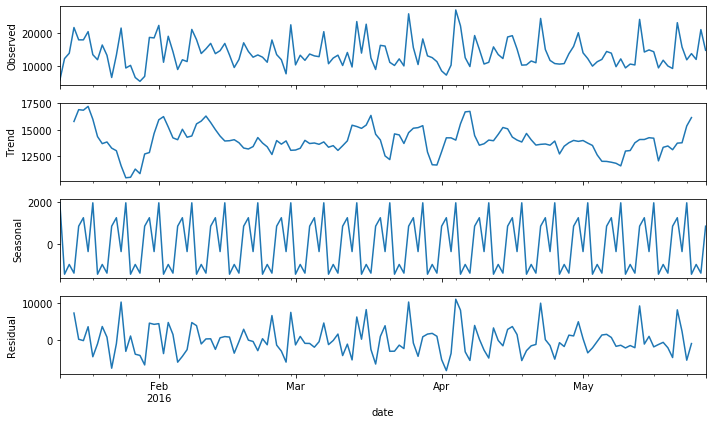

In [22]:
# decomposing the timeseries into 3 components: trend, seasonality, and noise
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(by_date0, model='additive')

# to make the plot bigger:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

fig = decomposition.plot()
plt.show()


#### Remarks:
- Looking at the trend, it seems like the data can be considered static (no increasing/decreasing trend, but a lot of smaller increases/decreases)
- Seasonality is present, which indicates that I should use SARIMA instead of ARIMA, as it accounts for seasonality
- 19 seasonality patterns - seasonality parameter (s) should be every week --> s= 52
- Residual shows the noise and there is a lot of it throughout the months

### SARIMA (Seasonal AutoRegressive Integrated Moving Averages model)
#### Parameter selection
SARIMA parameters: ARIMA(p,d,q)(P,D,Q)s: p-autoregression, d-integration, q- moving average; PDQ - same, but seasonal components; s-periodicity(number of time steps for a single seasonal period)

Mostly following the source: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [49]:
import itertools

# defining the p, d and q parameters to take any value between 0 and 3 
p = d = q = range(0, 2) #(previously tried with 2 but the model wasn't good enough)

# generating all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# generating all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

- For validating the SARIMA models I will use the AIC value (Akaike Information Criterion), which measures how well a model fits the data and takes into account how complex the model is
- The model with the lowest AIC value should be the best model

In [50]:
# iterating through combinations of params with SARIMAX and printing them with their AIC score (from the source)
AIC_list = pd.DataFrame({}, columns=['param','seas_param','AIC'])
for param in pdq:
    for seas_param in seasonal_pdq:
        try:
            models = sm.tsa.statespace.SARIMAX(by_date0[:'2016-04-30'],
                                              order = param,
                                              seasonal_order = seas_param, 
                                              enforce_stationary = False, 
                                              enforce_invertibility = False)
            results = models.fit()
            
            print('ARIMA{}x{}52 - AIC:{}'.format(param, seas_param, results.aic))
            temp = pd.DataFrame([[param,  seas_param, results.aic]], columns=['param','seas_param','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)  # DataFrame append 는 일반 list append 와 다르게 이렇게 지정해주어야한다.
            del temp
        except:
            continue

# this bit of code takes pretty long to execute

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:2448.66073218095
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:1208.5904669377983
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:2353.774813321079
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:1207.9164323680172
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:2389.244184577794
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:1210.1144253439195
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:2385.877617607204
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:1209.3628610470512
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:2225.1908695369075
ARIMA(0, 1, 0)x(0, 1, 0, 52)52 - AIC:1227.040364013165
ARIMA(0, 1, 0)x(1, 0, 0, 52)52 - AIC:2223.790259410075
ARIMA(0, 1, 0)x(1, 1, 0, 52)52 - AIC:1187.0158647549647
ARIMA(0, 1, 1)x(0, 0, 0, 52)52 - AIC:2181.306092825249
ARIMA(0, 1, 1)x(0, 1, 0, 52)52 - AIC:1206.9114224942537
ARIMA(0, 1, 1)x(1, 0, 0, 52)52 - AIC:2182.7978365370395
ARIMA(0, 1, 1)x(1, 1, 0, 52)52 - AIC:1180.4970092140682
ARIMA(1, 0, 0)x(0, 0, 0, 52)52 - AIC:2244.7433581477567
ARIMA(1, 0, 0)x(0, 1, 0, 52)52 - AIC:1210.1262045959313


In [51]:
AIC_list.loc[AIC_list.AIC == (AIC_list.AIC).min()]

,param,seas_param,AIC
15,"(0, 1, 1)","(1, 1, 0, 52)",1180.497009


- The model with min AIC is: **ARIMA(0, 1, 1)x(1, 1, 0, 52)**, so I consider it an optimal model which I will use to fit my data with
    



In [53]:
model = sm.tsa.statespace.SARIMAX(by_date0,
                                order=(0,1,1),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6033      0.350     -1.725      0.085      -1.289       0.082
ar.S.L52      -0.5532      0.274     -2.017      0.044      -1.091      -0.016
sigma2      5.944e+07   3.45e-10   1.72e+17      0.000    5.94e+07    5.94e+07


- coef column shows the importance (weight) of each feature and how each one impacts the time series
- ''P>|z| column informs us of the significance of each feature weight'' - a p-value

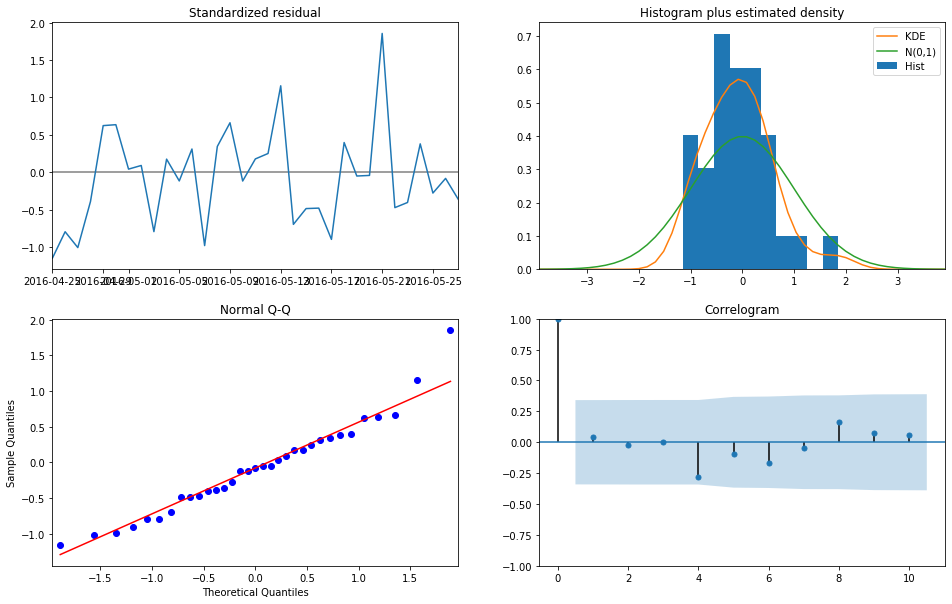

In [54]:
# looking at diagnostics plot to see if anything seems very wrong - seems good, though
result.plot_diagnostics(figsize=(16, 10))
plt.show()

Main question: Are the residuals normally distributed around 0? If they are, the model will probably be good


- Plot 1 - standardized residuals: doesn't give much info
- Plot 2 - KDE (kernel density estimation) is sort of close to the normal distribution with 0 mean and 1 std (N(0,1))
- Plot 3 - Normal Q-Q plot shows that the theoretical quantities and the sample quantities (taken from N(0,1)) kind of match - indication that the residuals are normally distributed
- Plot 4 - Correlogram: shows autocorrelation - residuals correlated with the lagged version of itself - relatively low

The model could be a good fit - needs to be validated.

#### Validating forecasts
I will try to predict the last 4 weeks of the data (around 21% of the total sample)

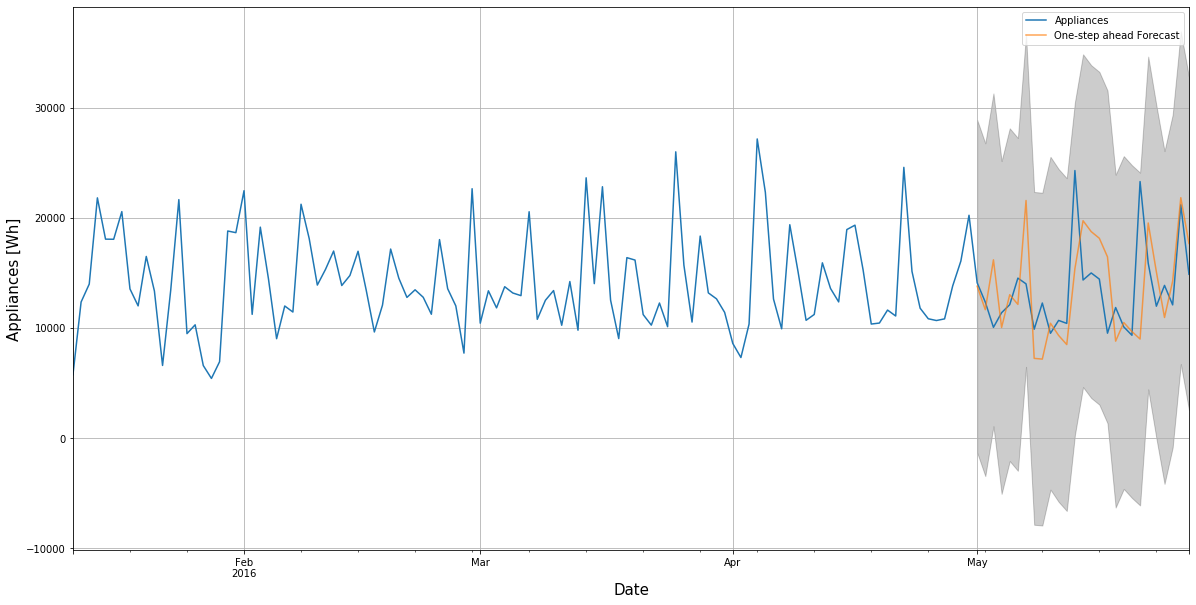

In [55]:
y_pred = result.get_prediction(start = pd.to_datetime('2016-05-01'), dynamic = False) 

# creating a confidence level for the prediction
pred_ci = y_pred.conf_int()

ax = by_date0.plot(label='Appliances')
y_pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Appliances [Wh]', fontsize = 15)
plt.legend()
plt.grid()
plt.show()

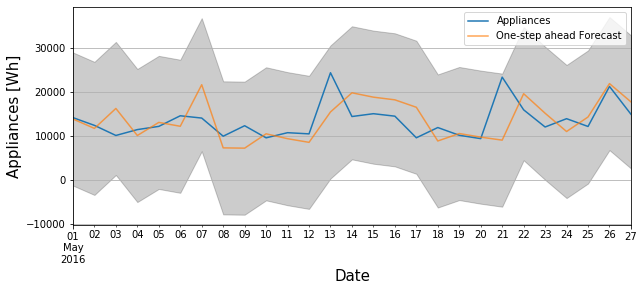

In [56]:
# zoomed in to just look at May

ax = by_date0['May 2016'].plot(label='Appliances')
y_pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Appliances [Wh]', fontsize = 15)
plt.legend()
plt.grid()
plt.show()

Looks pretty good! 

Evaluation based on errors:

In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

In [68]:
y_forecasted = y_pred.predicted_mean
y_true = by_date0.Appliances


In [69]:
# Mean Absolute Error
mae = np.abs(y_forecasted - y_true).mean()
# Mean Square Error
mse = ((y_forecasted - y_true)**2).mean()
# Root mean square error
rmse = np.sqrt(mse)

# error values:
print('\nSARIMA model errors:')
print('\nMean Absolute Error:', round(mae, 2))  
print('Mean Squared Error:', round(mse, 2))  
print('Root Mean Squared Error:', round(rmse, 2))


SARIMA model errors:

Mean Absolute Error: 3457.41
Mean Squared Error: 21703350.72
Root Mean Squared Error: 4658.69


In [70]:
by_date.Appliances.describe()

count      138.000000
mean     13971.086957
std       4393.151220
min       5400.000000
25%      10812.500000
50%      13255.000000
75%      16020.000000
max      27150.000000
Name: Appliances, dtype: float64

#### Remarks: 
- RMSE is 33% (like the standard deviation) - so the model is not ideal

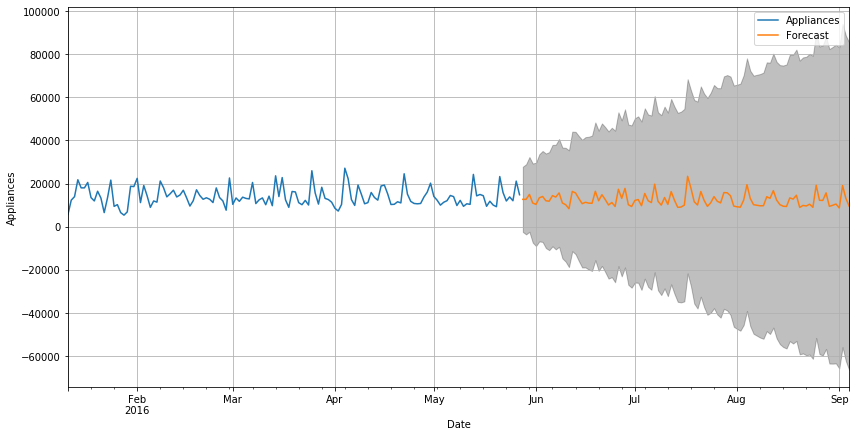

In [75]:
predictions = result.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = by_date0.plot(label='Appliances', figsize=(14, 7))
predictions.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Appliances')
plt.grid()
plt.legend()
plt.show()

## Conclusions:
- The model I used to predict appliance energy consumption based on the timeseries data was **SARIMA**
- I trained the model on the data set excluding the last 4 weeks (the month of May)
- The RMSE was very high - 33% (comparable to the std), which indicates that the model can be improved or that another model could be used